# Exercise 4 Neural Network Learning
---

In [9]:
function W = randInitializeWeights(L_in, L_out)
% Randomly initialize the weights of a layer with L_in incoming connections and L_out outgoing connections
% Initialize W randomly so that we break the symmetry while training the neural network.
% Note: The first column of W corresponds to the parameters for the bias unit
W = zeros(L_out, 1 + L_in);
epsilon_init = 0.12; 
W = rand(L_out, 1 + L_in) * 2 * epsilon_init - epsilon_init;
end

In [10]:
function p = predict(Theta1, Theta2, X)
% Outputs the predicted label of X given the trained weights (Theta1, Theta2)
m = size(X, 1);
num_labels = size(Theta2, 1);
p = zeros(size(X, 1), 1);
h1 = sigmoid([ones(m, 1) X] * Theta1');
h2 = sigmoid([ones(m, 1) h1] * Theta2');
[dummy, p] = max(h2, [], 2);
% [~, p] = max(h2, [], 2);
end

In [11]:
function [J grad] = nnCostFunction(nn_params, ...
                                   input_layer_size, ...
                                   hidden_layer_size, ...
                                   num_labels, ...
                                   X, y, lambda)

% Init
Theta1 = reshape(nn_params(1:hidden_layer_size * (input_layer_size + 1)), ...
                 hidden_layer_size, (input_layer_size + 1));
Theta2 = reshape(nn_params((1 + (hidden_layer_size * (input_layer_size + 1))):end), ...
                 num_labels, (hidden_layer_size + 1));         
m = size(X, 1);

% Transfer y
TmpY = [zeros(m, num_labels)]; 
for j = 1:m, TmpY(j,y(j)) = 1; end;

% Feedforward and compute J.
A1 = [ones(m, 1) X]; 
A2 = [ones(m, 1) sigmoid(A1 * Theta1')];
A3 = sigmoid(A2 * Theta2');
cost = - (1 / m) * sum(sum( TmpY .* log(A3) + (1 - TmpY) .* log(1 - A3) ));
cost_regularization = [lambda / (2 * m)] * [sum(sum((Theta1(:,2:end)).^2)) + sum(sum((Theta2(:,2:end)).^2))];

% Backpropagation algorithm to compute grad.
D3 = A3 - TmpY; 
D2 = (D3 * Theta2(:, 2:end)) .* ( sigmoid(A1 * Theta1') .* (1 - sigmoid(A1 * Theta1')) );
Theta1_grad = (1/m) .* ((D2)' * A1);
Theta2_grad = (1/m) .* ((D3)' * A2);
Theta1_grad(:, 2:end) = Theta1_grad(:,2:end) + (lambda / m) .* Theta1(:, 2:end); % regularization
Theta2_grad(:, 2:end) = Theta2_grad(:,2:end) + (lambda / m) .* Theta2(:, 2:end);

% Return J and Grad
J = cost + cost_regularization;
grad = [Theta1_grad(:) ; Theta2_grad(:)]; % gradients

% Debugging
%disp(sprintf(['y (%0.0f x %0.0f) --> TmpY (%0.0f x %0.0f)'], size(y), size(TmpY)));
%disp(sprintf(["A2 = A1 * Theta1' --> (%0.0f x %0.0f) = (%0.0f x %0.0f) x (%0.0f x %0.0f), A2 need + bias"], size(A2), size(A1), size(Theta1')));
%disp(sprintf(["A3 = sigmoid(A2 * Theta2') --> (%0.0f x %0.0f) = (%0.0f x %0.0f) x (%0.0f x %0.0f)"], size(A3), size(A2), size(Theta2')));
%disp(sprintf(['J size: %0.0f x %0.0f'], size(J)));
%disp(sprintf(['D3 size: %0.0f x %0.0f'], size(D3)));
%disp(sprintf(['D2 size: %0.0f x %0.0f'], size(D2)));
%disp(sprintf(['Theta1_grad size: %0.0f x %0.0f'], size(Theta1_grad)));
%disp(sprintf(['Theta2_grad size: %0.0f x %0.0f'], size(Theta2_grad)));
%disp(sprintf(['grad size: %0.0f x %0.0f'], size(grad)));

end

In [12]:
function numgrad = computeNumericalGradient(J, theta)
numgrad = zeros(size(theta));
perturb = zeros(size(theta));
e = 1e-4;
for p = 1:numel(theta)
    % Set perturbation vector
    perturb(p) = e;
    loss1 = J(theta - perturb);
    loss2 = J(theta + perturb);
    % Compute Numerical Gradient
    numgrad(p) = (loss2 - loss1) / (2*e);
    perturb(p) = 0;
end;
end

In [1]:
function W = debugInitializeWeights(fan_in, fan_out)
% Set W to zeros
W = zeros(fan_out, 1 + fan_in);
% Initialize W using "sin", this ensures that W is always of the same values and will be useful for debugging
W = reshape(sin(1:numel(W)), size(W)) / 10;
end

In [14]:
function checkNNGradients(lambda)
% Creates a small neural network to check the backpropagation gradients
% It will output the analytical gradients produced by your backprop code 
% and the numerical gradients (computed using computeNumericalGradient). 
% These two gradient computations should result in very similar values.

if ~exist('lambda', 'var') || isempty(lambda)
    lambda = 0;
end

input_layer_size = 3;
hidden_layer_size = 5;
num_labels = 3;
m = 5;

% We generate some 'random' test data
Theta1 = debugInitializeWeights(input_layer_size, hidden_layer_size);
Theta2 = debugInitializeWeights(hidden_layer_size, num_labels);
% Reusing debugInitializeWeights to generate X
X  = debugInitializeWeights(input_layer_size - 1, m);
y  = 1 + mod(1:m, num_labels)';

% Unroll parameters
nn_params = [Theta1(:) ; Theta2(:)];

% Short hand for cost function
costFunc = @(p) nnCostFunction(p, input_layer_size, hidden_layer_size, ...
                               num_labels, X, y, lambda);

[cost, grad] = costFunc(nn_params);
numgrad = computeNumericalGradient(costFunc, nn_params);

% Visually examine the two gradient computations.  The two columns
% you get should be very similar. 
disp([numgrad grad]);
fprintf(['The above two columns you get should be very similar.\n' ...
         '(Left-Your Numerical Gradient, Right-Analytical Gradient)\n\n']);

% Evaluate the norm of the difference between two solutions.  
% If you have a correct implementation, and assuming you used EPSILON = 0.0001 
% in computeNumericalGradient.m, then diff below should be less than 1e-9
diff = norm(numgrad-grad)/norm(numgrad+grad);

fprintf(['If your backpropagation implementation is correct, then \n' ...
         'the relative difference will be small (less than 1e-9). \n' ...
         '\nRelative Difference: %g\n'], diff);

end

In [15]:
clear ; close all; clc % Initialization

In [16]:
%% Setup the parameters you will use for this exercise
input_layer_size  = 400;  % 20x20 Input Images of Digits
hidden_layer_size = 25;   % 25 hidden units
num_labels = 10;          % 10 labels, from 1 to 10   
                          % (note that we have mapped "0" to label 10)

**=========== Part 1: Loading and Visualizing Data =============**  

We start the exercise by first loading and visualizing the dataset.  
You will be working with a dataset that contains handwritten digits.  

In [17]:
% Loading and Visualizing Data ...
load('ex3-4data.mat');
m = size(X, 1);

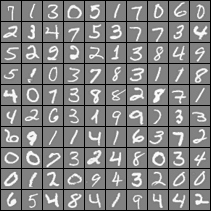

In [18]:
% Randomly select 100 data points to display
sel = randperm(size(X, 1));
sel = sel(1:100);
visualizationHandwrittenDigits(X(sel, :));

**================ Part 2: Loading Parameters ================**  

In this part of the exercise, we load some pre-initialized neural network parameters.  

In [19]:
% Loading Saved Neural Network Parameters ...
% Load the weights into variables Theta1 and Theta2
load('ex4weights.mat');

In [20]:
% Unroll parameters 
nn_params = [Theta1(:) ; Theta2(:)];

In [21]:
pred = predict(Theta1, Theta2, X);
fprintf('\nTraining Set Accuracy: %f\n', mean(double(pred == y)) * 100);


Training Set Accuracy: 97.520000


**================ Part 3: Compute Cost (Feedforward) ================**     

To the neural network, you should first start by implementing the feedforward part of the neural network that returns the cost only. You should complete the code in nnCostFunction.m to return cost. After implementing the feedforward to compute the cost, you can verify that your implementation is correct by verifying that you get the same cost as us for the fixed debugging parameters.  

We suggest implementing the feedforward cost *without* regularization first so that it will be easier for you to debug. Later, in part 4, you will get to implement the regularized cost.  

In [22]:
% Weight regularization parameter (we set this to 0 here).
% J should be about 0.287629
lambda = 0;
J = nnCostFunction(nn_params, input_layer_size, hidden_layer_size, ...
                   num_labels, X, y, lambda)

J =  0.28763


**=============== Part 4: Implement Regularization ===============**  
Once your cost function implementation is correct, you should now continue to implement the regularization with the cost.  

In [23]:
% Checking Cost Function with Regularization
% Weight regularization parameter (we set this to 1 here).
% J should be about 0.383770
lambda = 1;
J = nnCostFunction(nn_params, input_layer_size, hidden_layer_size, ...
                   num_labels, X, y, lambda)

J =  0.38377


**================ Part 5: Sigmoid Gradient  ================**  
Before you start implementing the neural network, you will first implement the gradient for the sigmoid function. You should complete the code in the sigmoidGradient.m file.  

In [25]:
% Evaluating sigmoid gradient...
% For large values (both positive and negative) of z, the gradient should be close to 0. 
% When z = 0, the gradient should be exactly 0.25.
sigmoid(-999) .* (1-sigmoid(-999))
sigmoid(-1  ) .* (1-sigmoid(-1  ))
sigmoid(-0.5) .* (1-sigmoid(-0.5))
sigmoid( 0  ) .* (1-sigmoid( 0  ))
sigmoid( 0.5) .* (1-sigmoid( 0.5))
sigmoid( 1  ) .* (1-sigmoid( 1  ))
sigmoid( 999) .* (1-sigmoid( 999))

ans = 0
ans =  0.19661
ans =  0.23500
ans =  0.25000
ans =  0.23500
ans =  0.19661
ans = 0


**================ Part 6: Initializing Pameters ================**  
In this part of the exercise, you will be starting to implment a two layer neural network that classifies digits. You will start by implementing a function to initialize the weights of the neural network (randInitializeWeights.m)  

In [26]:
% Initializing Neural Network Parameters ...
initial_Theta1 = randInitializeWeights(input_layer_size, hidden_layer_size);
initial_Theta2 = randInitializeWeights(hidden_layer_size, num_labels);

% Unroll parameters
initial_nn_params = [initial_Theta1(:) ; initial_Theta2(:)];

**=============== Part 7: Implement Backpropagation ===============**  
Once your cost matches up with ours, you should proceed to implement the backpropagation algorithm for the neural network. You should add to the code you've written in nnCostFunction.m to return the partial derivatives of the parameters.  

In [27]:
% Check gradients by running checkNNGradients.
% In fact, the gradient is detected by the cost function.
% So, first, you must make sure your Cost Function is correct.
checkNNGradients;

  -0.0092782523  -0.0092782524
   0.0088991196   0.0088991196
  -0.0083601076  -0.0083601076
   0.0076281355   0.0076281355
  -0.0067479837  -0.0067479837
  -0.0000030498  -0.0000030498
   0.0000142869   0.0000142869
  -0.0000259383  -0.0000259383
   0.0000369883   0.0000369883
  -0.0000468760  -0.0000468760
  -0.0001750601  -0.0001750601
   0.0002331464   0.0002331464
  -0.0002874687  -0.0002874687
   0.0003353203   0.0003353203
  -0.0003762156  -0.0003762156
  -0.0000962661  -0.0000962661
   0.0001179827   0.0001179827
  -0.0001371497  -0.0001371497
   0.0001532471   0.0001532471
  -0.0001665603  -0.0001665603
   0.3145449700   0.3145449701
   0.1110565882   0.1110565882
   0.0974006970   0.0974006970
   0.1640908188   0.1640908188
   0.0575736493   0.0575736493
   0.0504575855   0.0504575855
   0.1645679323   0.1645679323
   0.0577867378   0.0577867378
   0.0507530173   0.0507530173
   0.1583393339   0.1583393339
   0.0559235296   0.0559235296
   0.0491620841   0.0491620841
   0.151

**=============== Part 8: Implement Regularization ===============** 

Once your backpropagation implementation is correct, you should now continue to implement the regularization with the cost and gradient.

In [20]:
% Checking Backpropagation with Regularization ...
% Check gradients by running checkNNGradients
lambda = 3;
checkNNGradients(lambda);

  -0.009278252  -0.009278252
   0.008899120   0.008899120
  -0.008360108  -0.008360108
   0.007628136   0.007628136
  -0.006747984  -0.006747984
  -0.016767980  -0.016767980
   0.039433483   0.039433483
   0.059335556   0.059335556
   0.024764097   0.024764097
  -0.032688143  -0.032688143
  -0.060174472  -0.060174472
  -0.031961229  -0.031961229
   0.024922553   0.024922553
   0.059771762   0.059771762
   0.038641055   0.038641055
  -0.017370465  -0.017370465
  -0.057565867  -0.057565867
  -0.045196385  -0.045196385
   0.009145880   0.009145880
   0.054610155   0.054610155
   0.314544970   0.314544970
   0.111056588   0.111056588
   0.097400697   0.097400697
   0.118682669   0.118682669
   0.000038193   0.000038193
   0.033692656   0.033692656
   0.203987128   0.203987128
   0.117148233   0.117148233
   0.075480126   0.075480126
   0.125698067   0.125698067
  -0.004075883  -0.004075883
   0.016967709   0.016967709
   0.176337550   0.176337550
   0.113133142   0.113133142
   0.086162895

In [28]:
% Also output the costFunction debugging values
% w/ lambda = 3, this value should be about 0.576051
lambda = 3;
debug_J  = nnCostFunction(nn_params, input_layer_size, ...
                          hidden_layer_size, num_labels, X, y, lambda)

debug_J =  0.57605


**=================== Part 8: Training NN ===================**  

You have now implemented all the code necessary to train a neural network. To train your neural network, we will now use "fmincg", which is a function which works similarly to "fminunc". Recall that these advanced optimizers are able to train our cost functions efficiently as long as we provide them with the gradient computations.

In [22]:
% Training Neural Network...
%  After you have completed the assignment, change the MaxIter to a larger
%  value to see how more training helps.
options = optimset('MaxIter', 50);

%  You should also try different values of lambda
lambda = 1;

% Create "short hand" for the cost function to be minimized
costFunction = @(p) nnCostFunction(p, ...
                                   input_layer_size, ...
                                   hidden_layer_size, ...
                                   num_labels, X, y, lambda);

In [23]:
% Now, costFunction is a function that takes in only one argument 
% (the neural network parameters)
[nn_params, cost] = fmincg(costFunction, initial_nn_params, options);

Iteration    50 | Cost: 4.633861e-01


In [24]:
% Obtain Theta1 and Theta2 back from nn_params
Theta1 = reshape(nn_params(1:hidden_layer_size * (input_layer_size + 1)), ...
                 hidden_layer_size, (input_layer_size + 1));

Theta2 = reshape(nn_params((1 + (hidden_layer_size * (input_layer_size + 1))):end), ...
                 num_labels, (hidden_layer_size + 1));

In [25]:
whos

Variables in the current scope:

   Attr Name                   Size                     Bytes  Class
   ==== ====                   ====                     =====  ===== 
        J                      1x1                          8  double
        Theta1                25x401                    80200  double
        Theta2                10x26                      2080  double
        X                   5000x400                 16000000  double
        ans                    1x1                          8  double
        cost                  50x1                        400  double
        costFunction           1x1                          0  function_handle
        debug_J                1x1                          8  double
        hidden_layer_size      1x1                          8  double
        initial_Theta1        25x401                    80200  double
        initial_Theta2        10x26                      2080  double
        initial_nn_params  10285x1               

**================= Part 9: Visualize Weights =================**  

You can now "visualize" what the neural network is learning by displaying the hidden units to see what features they are capturing in the data.

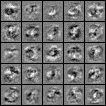

In [27]:
% Visualizing Neural Network... 
visualizationHandwrittenDigits(Theta1(:, 2:end));

**================= Part 10: Implement Predict =================**  

After training the neural network, we would like to use it to predict the labels. You will now implement the "predict" function to use the neural network to predict the labels of the training set. This lets you compute the training set accuracy.

In [28]:
pred = predict(Theta1, Theta2, X);
fprintf('\nTraining Set Accuracy: %f\n', mean(double(pred == y)) * 100);


Training Set Accuracy: 95.600000



Displaying Example Image

Neural Network Prediction: 6 (digit 6)


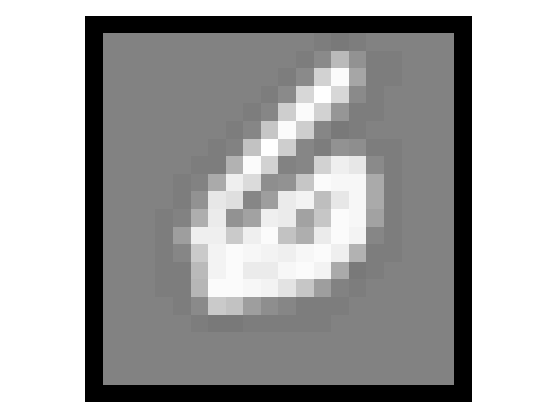

In [31]:
%  To give you an idea of the network's output, you can also run
%  through the examples one at the a time to see what it is predicting.

%  Randomly permute examples
rp = randperm(m);

for i = 1:m
    #figure(i);
    % Display 
    fprintf('\nDisplaying Example Image\n');
    visualizationHandwrittenDigits(X(rp(i), :));

    pred = predict(Theta1, Theta2, X(rp(i),:));
    fprintf('\nNeural Network Prediction: %d (digit %d)\n', pred, mod(pred, 10));
    
    % Pause with quit option
    %s = input('Paused - press enter to continue, q to exit:','s');
    s = 'q';
    if s == 'q'
      break
    end
end